<a href="https://colab.research.google.com/github/GermanOmar/SLM-ML/blob/main/ML_LPBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple machine learning regressors for predicting relative density in materials manufactured by laser powder bed fusion

<a href="https://ibb.co/wLnFqkY"><img src="https://i.ibb.co/8ByLwCX/SLM.png" WIDTH="620" HEIGHT="360"  border="0"></a>

 Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

 Upload database:

In [2]:
!git clone https://github.com/GermanOmar/LPBF

Cloning into 'LPBF'...
fatal: could not read Username for 'https://github.com': No such device or address


In [25]:
#Experimental data
data = pd.read_table('/content/DB6.txt')
data.describe()


,Material,Psize,Lpower,Vel,Hatch,Height,Spot,Geom,RD
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,3.483217,32.452863,236.927169,928.191298,0.104953,0.039709,0.105339,31.776327,96.302622
std,1.863924,7.172901,121.529338,580.133725,0.061997,0.033960,0.080578,22.125502,5.483606
min,1.000000,14.630000,30.000000,18.760000,0.020000,0.020000,0.030000,1.000000,34.840000
25%,2.000000,28.850000,150.000000,600.000000,0.080000,0.030000,0.070000,17.990000,95.865000
50%,3.000000,31.060000,200.000000,800.000000,0.100000,0.030000,0.080000,25.000000,98.210000
75%,5.000000,36.690000,305.000000,1200.000000,0.120000,0.040000,0.100000,37.980000,99.220000
max,6.000000,68.000000,950.000000,10000.000000,0.800000,0.460000,0.400000,89.990000,100.000000


In [40]:
data['RD ']

,RD
0,95.40
1,97.70
2,93.80
3,93.90
4,97.14
...,...
1574,99.65
1575,98.84
1576,98.09
1577,98.47


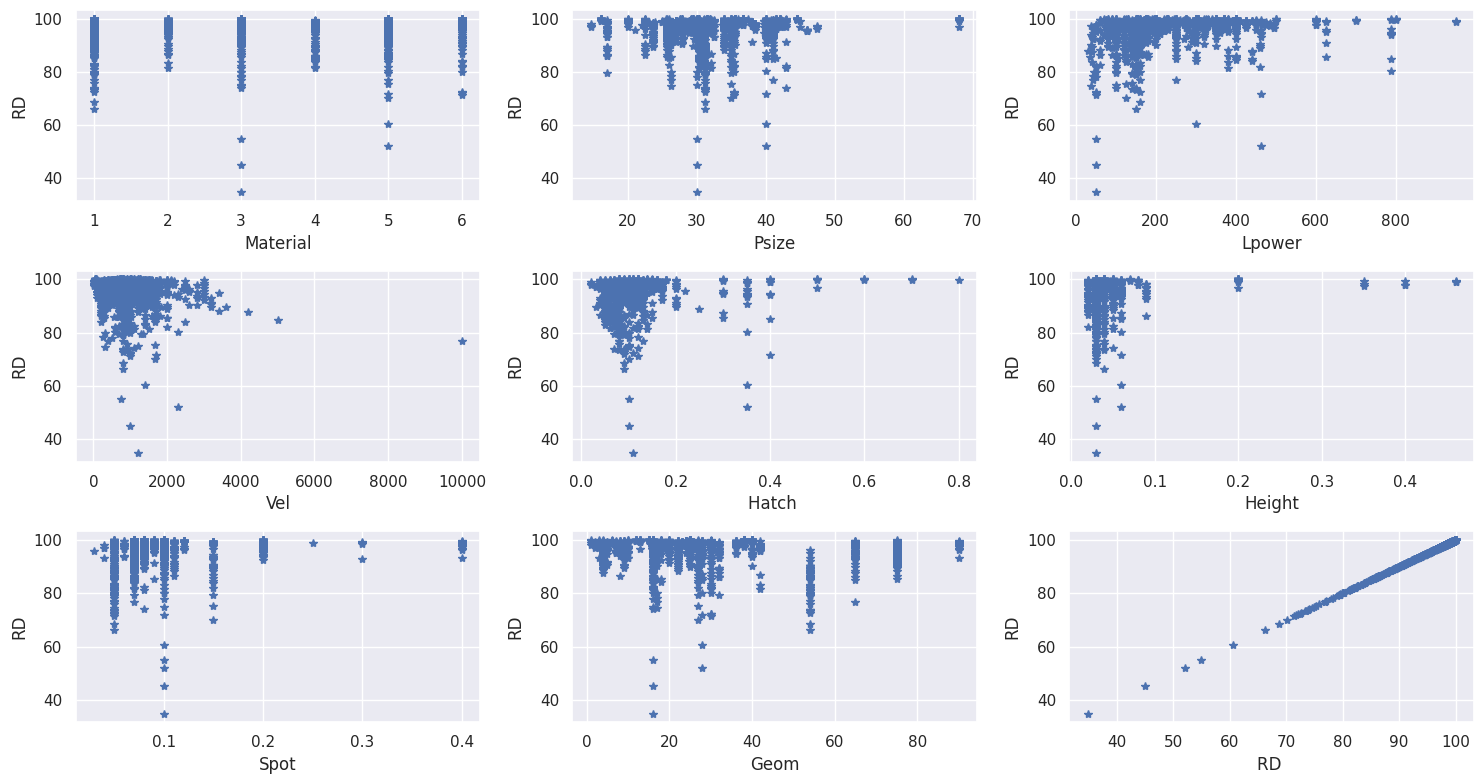

In [41]:
fields = ['Material', 'Psize', 'Lpower', 'Vel', 'Hatch ', 'Height', 'Spot', 'Geom', 'RD ']
import seaborn as sns
sns.set()

fig = plt.figure()
fig.set_size_inches((15,8))
for i, field in enumerate(fields):
  plt.subplot(3, 3, i + 1)
  plt.plot(data[field], data['RD '], 'b*')
  plt.xlabel(field)
  plt.ylabel('RD')

plt.tight_layout()

#X=data[['WD', 'WFS','TS','P']]
#Y=data['ME'][:,None]

#fig.tight_layout()


Setting inputs - output:

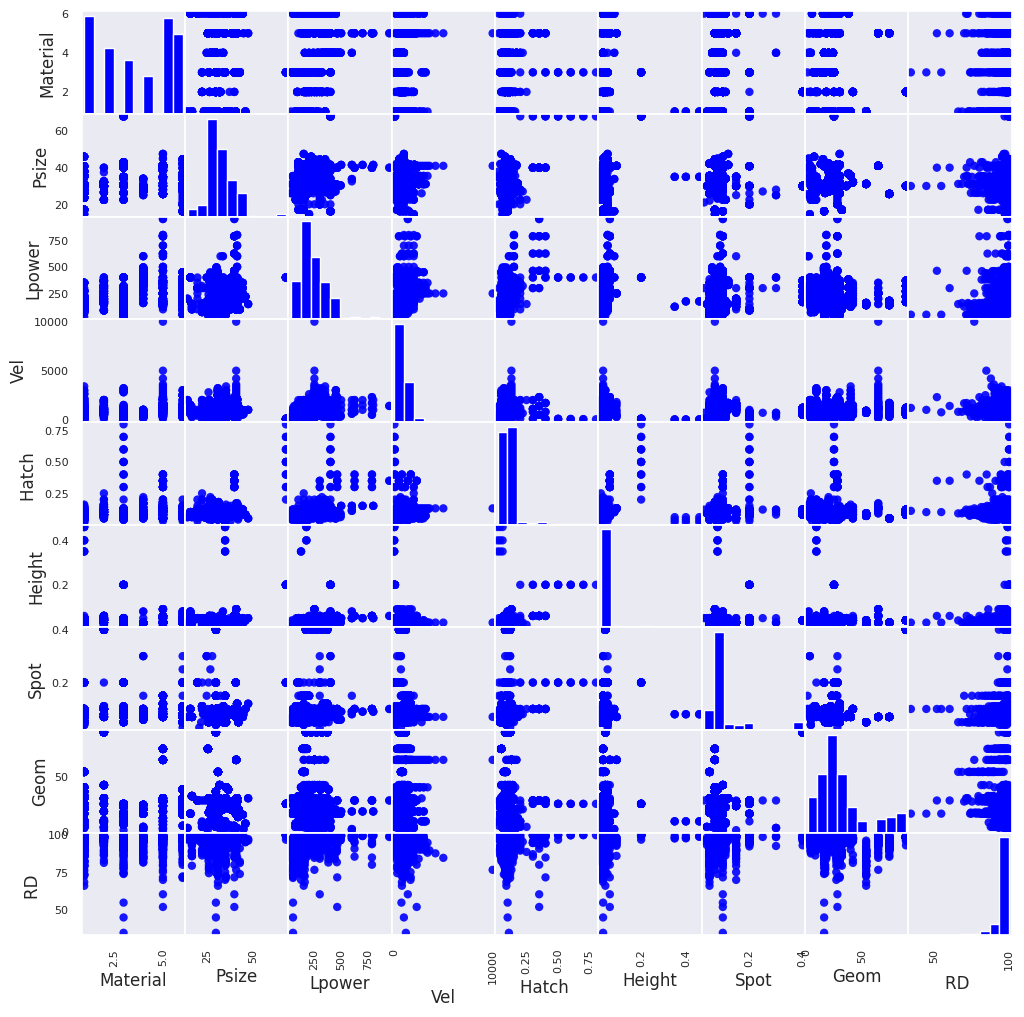

In [74]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
import seaborn as sns
sns.set()

plt.rcParams["axes.grid"] = False

#pd.tools.plotting.scatter_matrix(df, alpha=0.2, c='red', hist_kwds={'color':['burlywood']})

#scatter_matrix(data, alpha=0.2, marker='s', figsize = (12,12), color = 'blue')
scatter_matrix(data, alpha=0.9,marker='-', figsize = (12,12),  c='blue', hist_kwds={'color':['blue']})

warnings.filterwarnings("ignore")

In [44]:
X = data[['Material', 'Psize', 'Lpower', 'Vel', 'Hatch ', 'Height', 'Spot', 'Geom']] # Added a missing comma between 'PS' and 'D'


In [46]:
Y=data['RD '].to_numpy()[:,None] # Convert the Pandas Series to a NumPy array before slicing

# RD prediction

 Split data

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 1184  test samples: 395


In [52]:
YTR=np.mean(y_train)
YTR

96.31804898648649

In [53]:
YT=np.mean(y_test)
YT

96.25637974683544

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)


# Lazy predict

In [65]:
!pip install lazypredict
warnings.filterwarnings("ignore")

In [66]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [67]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 79%|███████▊  | 33/42 [00:06<00:01,  7.43it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:07<00:00,  5.94it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 1184, number of used features: 8
[LightGBM] [Info] Start training from score 96.318049
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.71       0.72  3.18        0.85
RandomForestRegressor                        0.71       0.72  3.20        0.48
XGBRegressor                                 0.70       0.70  3.28        0.17
ExtraTreeRegressor                           0.67       0.67  3.43        0.03
BaggingRegressor                             0.66       0.67  3.45        0.28
HistGradientBoostingRegressor              

###Results:

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

### XGB

In [63]:
import pickle
import xgboost as xgb
import numpy as np # Import numpy

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=80, min_child_weight=1, missing=np.nan,  # Set missing to np.nan
             n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.1, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)


-XGBRegressor -
------------------
MSE test: 12.944252187064654

R2:  0.6408860569885912
RMSE:  3.5978121389345294
MAE:  1.5545832643146755
IM:  3.9357266339034687



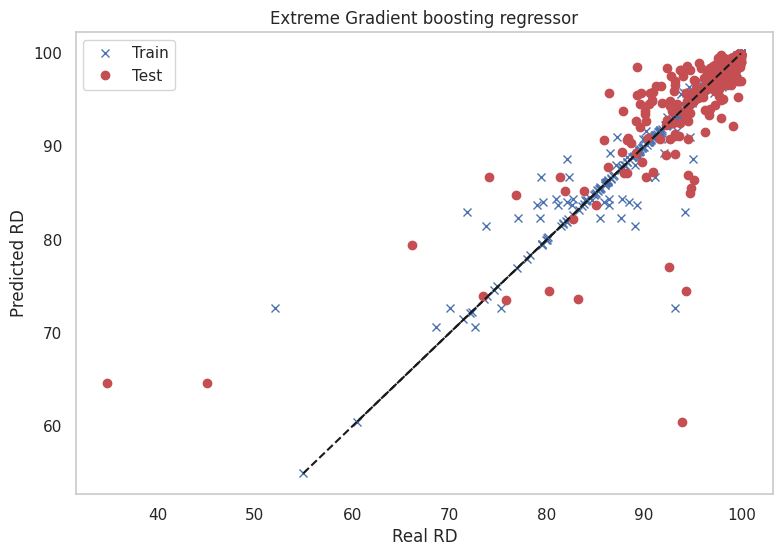

In [64]:
print("-XGBRegressor -")
print("------------------")
y_star_train = xgbr.predict(X_train)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted RD')
plt.xlabel('Real RD')
plt.title("Extreme Gradient boosting regressor")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

In [58]:
# get importance

importance = xgbr.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.10926
Feature: 1, Score: 0.06640
Feature: 2, Score: 0.13019
Feature: 3, Score: 0.07212
Feature: 4, Score: 0.05727
Feature: 5, Score: 0.02989
Feature: 6, Score: 0.09963
Feature: 7, Score: 0.43524


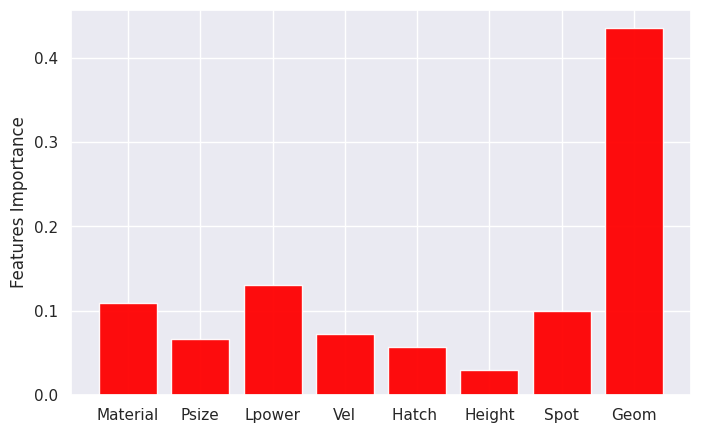

In [59]:
# Create lists for the plot
import seaborn as sns
sns.set()

#plt.rcParams["axes.grid"] = False

labels = ['Material', 'Psize', 'Lpower', 'Vel', 'Hatch ', 'Height', 'Spot', 'Geom' ]
x_pos = np.arange(len(labels))

fig, ax = plt.subplots()
fig.set_size_inches((8,5))

ax.bar(x_pos, importance, align='center', alpha=0.95, color='red')
ax.set_ylabel('Features Importance')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
#ax.set_title('Features Importance Analysis')
ax.yaxis.grid(True)


## GBR

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=1000, random_state=42, learning_rate=0.1 )

#START TRAINING
GBR.fit(X_train, y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)


print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()


-Gradient boosting regressor-
-----------------------------
MSE test: 10.676706363509421

R2:  0.7037948531004068
RMSE:  3.2675229706169504
MAE:  1.5958543931343718
IM:  3.6484510544401583



## RFR

-----------------------------
MSE test: 10.287482140045741

R2:  0.7145931474772171
RMSE:  3.207410503824813
MAE:  1.4490322053808122
IM:  3.5310952328907077



Text(0.5, 1.0, 'Random forest')

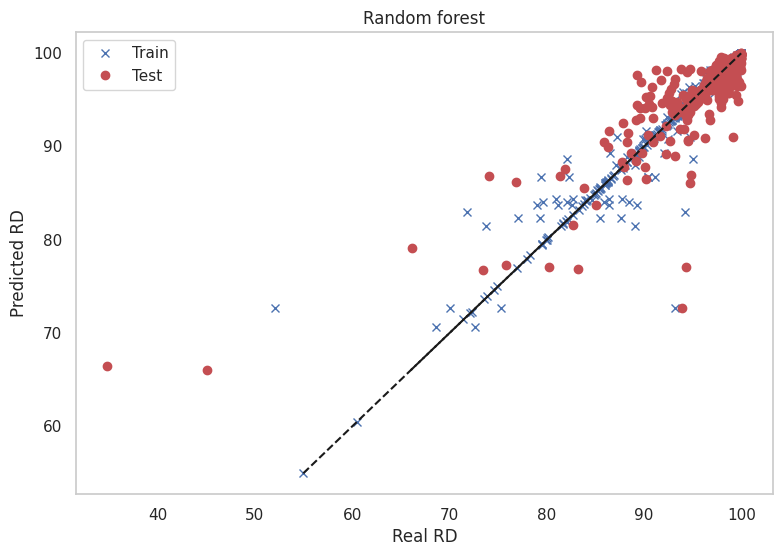

In [75]:
from sklearn.ensemble import RandomForestRegressor
#KERNEL
RFR=RandomForestRegressor(n_estimators=2000,max_depth=20)

#START TRAINING
RFR.fit(X_train,y_train)
#PREDICTION
y_pred=RFR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted RD')
plt.xlabel('Real RD')
plt.title("Random forest")

## Comparisson

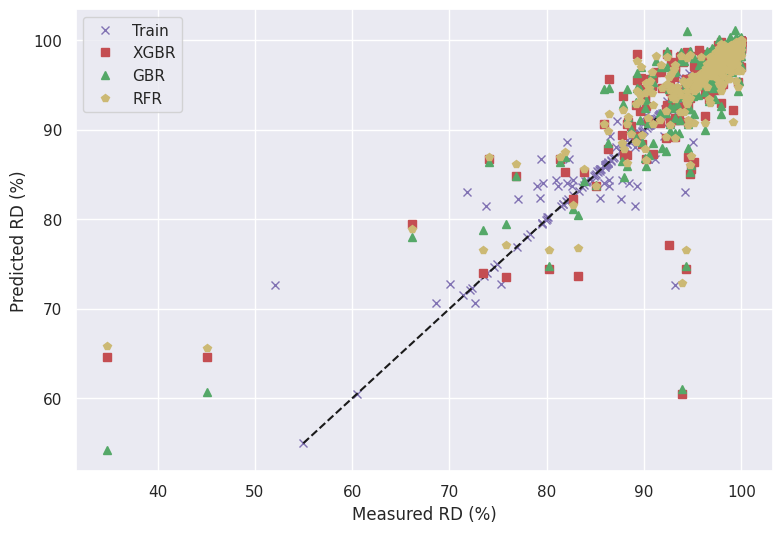

In [71]:
import seaborn as sns
sns.set()

y1=xgbr.predict(X_test)
y2=GBR.predict(X_test)
y4=RFR.predict(X_test)

#Plots
#sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
plt.rcParams["axes.grid"] = True
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'mx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y1, 'rs', label = 'XGBR')
plt.plot(y_test, y2, 'g^', label = 'GBR')
plt.plot(y_test, y4, 'yp', label = 'RFR')

plt.legend()
plt.ylabel('Predicted RD (%)')
plt.xlabel('Measured RD (%)')
#plt.title("Machine learning regressors")
print()



### CROSS-VALIDATION

In [72]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [ xgbr,  GBR, RFR ]
labels = ['XGBR',  'GBR',  'RFR']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels):
  #y_star = mod.predict(X)

  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)


  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
           XGBR | 0.5715 | 11.9018 | 1.5148 | 3.7921 
            GBR | 0.6217 | 10.5347 | 1.5496 | 3.6165 
            RFR | 0.6280 | 10.4726 | 1.5514 | 3.6080 
--------------------------------------------------------------


## Uncertainty quantification